<a href="https://colab.research.google.com/github/rahuladhikari20/pocket_book/blob/main/Team_Enigma_16bits_Regression_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project 1: Comprehensive Regression Analysis
### Course: Introduction to Machine Learning

This notebook is designed to guide you through a comprehensive regression analysis using various techniques. You will explore different methods, implement regularization techniques, and evaluate the performance of your models using various metrics and computational time.


## Submission Instructions

Once you are finished, follow these steps:

Make sure you have provided the team name, name of team members with IDs.

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end. Double check that there is a number next to each code cell and that these numbers are in order. Then, submit your project as follows:

Go to File > Print > Save as PDF. Double check that the entire notebook, from beginning to end, is in this PDF file. Upload the PDF and the notebook to Google Classroom.




### Team Name: Enigma 16bits
### Name and ID of Member 1: Subarna Adhikari, ID- B2330087
### Name and ID of Member 2: Anwesha Banerjee, ID- B2330071

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')
# Add all other libraries you would require


Mounted at /content/drive



## 1. Load the Dataset
**Instruction:** Load the chosen dataset and display its basic information and statistics. You may use any well-known dataset.

In [ ]:

# Loading a particular dataset
df=pd.read_csv('/content/drive/MyDrive/Life Expectancy Data.csv')

# Display the first few rows of the dataset
df.head(8)



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7


In [ ]:
df.shape

(2938, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:

# Display basic statistics
df.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df.describe(include=object)

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426



## 2. Data Preprocessing
**Instruction:** Perform any necessary preprocessing steps, including handling missing values, encoding categorical variables, and scaling features if required.


In [ ]:
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Status'] = le.fit_transform(df['Status'])

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Checking for missing values
df.isnull().sum()


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
df1= df.fillna(method='bfill')

<ipython-input-10-8b71037f5941>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1= df.fillna(method='bfill')


In [ ]:
df1.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


## Selecting Features and Target Values

In [ ]:
x = df1.drop(columns ='Life expectancy ')
x.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
y = df1['Life expectancy ']
y.head()

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print( "training data shape :", x_train.shape,
      "test data shape :", x_test.shape,
      "training data shape for target value :", y_train.shape,
      "test data shape for target value :", y_test.shape)

training data shape : (2350, 21) test data shape : (588, 21) training data shape for target value : (2350,) test data shape for target value : (588,)



## 3. Simple Linear Regression
**Instruction:** Implement a simple linear regression model using scikit-learn.


In [ ]:

# Define the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit the model on the training data
start_time_lr = time.time()
lr.fit(x_train,y_train)
end_time_lr= time.time()

# Predict on the test data
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print(y_pred_test)

[67.04655099 76.89130885 75.58650228 77.23516852 46.53956764 50.56301771
 68.08999873 70.55506921 74.07974263 54.56529157 52.20774264 63.26337678
 65.44154233 70.25410511 70.83606497 62.83279963 54.88576108 81.10166774
 68.35102989 80.77014582 81.06241252 84.06641915 70.78712636 68.73763734
 69.54933822 67.87381016 60.53819439 60.99011213 77.6538254  71.7341863
 66.15322555 75.36280882 68.39297945 68.52959742 81.10921235 58.9829129
 67.35715998 72.44102992 62.30284283 75.9507984  57.4318214  63.75489164
 74.99002315 79.71925328 75.77423353 58.86441209 78.60467465 70.25710125
 66.74199192 67.87024421 57.24215206 59.87307253 77.78028205 74.68428195
 72.82120808 59.58117769 75.26173807 69.8818502  66.95434473 69.69080166
 80.30802039 54.35030954 73.7554686  69.42915853 52.32115389 52.38150703
 53.86383535 80.0604296  59.25752112 77.05262765 81.07488691 74.65804072
 73.57562978 60.24154774 55.92098359 72.31555478 64.38524574 76.88746997
 56.06272279 63.78632846 64.07592316 61.9357763  67.0

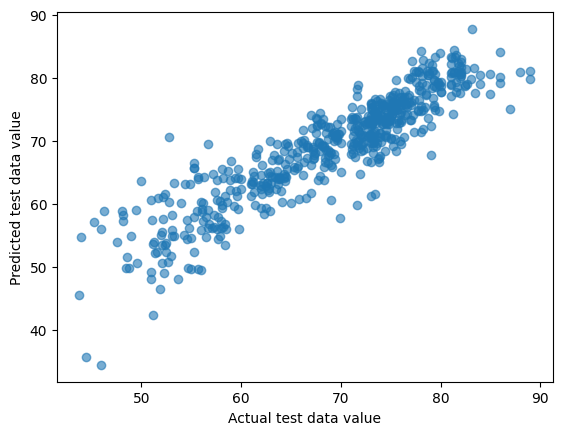

In [ ]:
#plotting graph to understand accuracy
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.xlabel('Actual test data value')
plt.ylabel('Predicted test data value')
plt.show()

In [ ]:
# Calculate performance metrics [MSE, MAE, R^2]
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_lr = mean_absolute_error(y_test, y_pred_test)
mae_lr_train = mean_absolute_error(y_train, y_pred_train)
mse_lr = mean_squared_error(y_test, y_pred_test)
mse_lr_train = mean_squared_error(y_train, y_pred_train)
r2_lr = r2_score(y_test, y_pred_test)
r2_lr_train = r2_score(y_train, y_pred_train)

# Print the metrics
print('MAE for LR (testing data):', mae_lr), print('MAE for LR (training data):', mae_lr_train)
print('MSE for LR (testing data):', mse_lr), print('MSE for LR (training data):', mse_lr_train)
print('R2 for LR (testing data):', r2_lr), print('R2 for LR (training data):', r2_lr_train)

MAE for LR (testing data): 2.90284322908345
MAE for LR (training data): 3.1306925776104046
MSE for LR (testing data): 15.611138179501667
MSE for LR (training data): 17.452833787682696
R2 for LR (testing data): 0.8199730378373384
R2 for LR (training data): 0.8091900738989077


(None, None)


## 4. Polynomial Regression
**Instruction:** Implement polynomial regression for degrees 2, 3, and 4.


####*Polynomial Regression of Degree 2*

In [ ]:

# Define polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2)

# Fit the linear model on polynomial features
start_time_poly2 = time.time()
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)
poly2.fit(x_train_poly2, y_train)
lr.fit(x_train_poly2, y_train)
end_time_poly2 = time.time()
print('prediction value', lr.predict(x_test_poly2))

y_pred_test_poly2 = lr.predict(x_test_poly2)
y_pred_train_poly2 = lr.predict(x_train_poly2)

mae_pr2 = mean_absolute_error(y_test, y_pred_test_poly2)
mae_pr2_train = mean_absolute_error(y_train, y_pred_train_poly2)

mse_pr2 = mean_squared_error(y_test, y_pred_test_poly2)
mse_pr2_train = mean_squared_error(y_train, y_pred_train_poly2)

r2_pr2 = r2_score(y_test, y_pred_test_poly2)
r2_pr2_train = r2_score(y_train, y_pred_train_poly2)

print('MAE for PR (deg: 2){for test data}:', mae_pr2), print('MAE for PR (deg: 2){for training data}:', mae_pr2_train)
print('MSE for PR (deg: 2){for testing data}:', mse_pr2), print('MSE for PR (deg: 2){for training data}:', mse_pr2_train)
print('R2 for PR (deg: 2){for testing data}:', r2_pr2), print('R2 for PR (deg: 2){for training data}:', r2_pr2_train)


prediction value [69.96089044 76.87790723 72.47463802 71.55956866 58.13238135 59.41129008
 61.78948494 73.43337979 75.90392917 47.95588719 51.09341674 54.06906035
 59.85057423 70.36135616 71.52165204 61.53277499 39.11468948 75.62846127
 67.30816702 78.91789742 78.67759886 85.25455536 72.68168577 69.97164359
 69.0194839  67.35069346 54.82556881 65.16176431 83.87115559 73.94700957
 67.92278679 73.77502069 68.3884927  70.18428641 77.76639941 52.18120957
 63.56440121 74.04328785 65.19065361 75.87574823 58.64525199 63.81249148
 78.08852312 80.09565403 76.91353903 54.36456823 78.80329783 69.60523361
 59.19197271 78.12692448 53.54433184 56.75921144 78.74789117 78.83792283
 71.32861482 52.91984285 73.78237992 70.07843217 64.35231647 74.89645334
 78.75778343 56.86893312 73.12548253 67.94285955 51.35654047 44.37530042
 53.9406922  80.23725845 59.50309523 73.79335755 87.58976478 75.74231426
 74.76766968 53.13690857 58.5668953  71.91751791 67.08141549 74.90047496
 58.12565981 66.72507936 63.606618

(None, None)

####*Polynomial Regression of Degree 3*

In [ ]:
poly3 = PolynomialFeatures(degree=3)
start_time_poly3 = time.time()
x_train_poly3 = poly3.fit_transform(x_train)
x_test_poly3 = poly3.transform(x_test)
poly3.fit(x_train_poly3, y_train)
lr.fit(x_train_poly3, y_train)
end_time_poly3 = time.time()
print('prediction value', lr.predict(x_test_poly3))

y_pred_test_poly3 = lr.predict(x_test_poly3)
y_pred_train_poly3 = lr.predict(x_train_poly3)

mae_pr3 = mean_absolute_error(y_test, y_pred_test_poly3)
mae_pr3_train = mean_absolute_error(y_train, y_pred_train_poly3)

mse_pr3 = mean_squared_error(y_test, y_pred_test_poly3)
mse_pr3_train = mean_squared_error(y_train, y_pred_train_poly3)

r2_pr3 = r2_score(y_test, y_pred_test_poly3)
r2_pr3_train = r2_score(y_train, y_pred_train_poly3)

print('MAE for PR (deg: 3){for testing data}:', mae_pr3), print('MAE for PR (deg: 3){for training data}:', mae_pr3_train)
print('MSE for PR (deg: 3){for testing data}:', mse_pr3), print('MSE for PR (deg: 3){for training data}:', mse_pr3_train)
print('R2 for PR (deg: 3){for testing data}:', r2_pr3), print('R2 for PR (deg: 3){for training data}:', r2_pr3_train)

prediction value [   61.11695011    69.45934192    69.04059401    75.65953199
    60.66543132    52.51697218    68.50405611    68.30120511
    68.31084071    66.43949363    50.09605068    67.79041631
    68.04394443    68.36137776    68.07991623    67.76941175
    62.97239475    75.37838788    69.39485097    82.38282025
    89.07454501    77.31740857    70.31244678    68.81332732
    68.39216496    68.27562857    67.44479738    67.72233602
    68.39004552    68.44691684    82.30528552    68.21824343
    69.68749712    68.18662587    86.13784356    56.67240568
    65.48243253    68.08209575    67.95430053    72.53629721
    67.39608654    65.02741197    79.08009252    72.80910749
    70.91936961    67.60130236    71.38776965    68.06938315
    67.49693133    96.40484245    62.92812616    68.35115673
    68.34525477    83.11105647    68.35849534    64.71152937
    71.79807035    68.49625615    68.05349929    86.28478658
    77.78210353    67.30961629    76.3718173     68.07376145
    58.

(None, None)

####*Polynomial Regression of degree 4*

In [ ]:
poly4 = PolynomialFeatures(degree=4)
start_time_poly4 = time.time()
x_train_poly4 = poly4.fit_transform(x_train)
x_test_poly4 = poly4.transform(x_test)
poly4.fit(x_train_poly4, y_train)
lr.fit(x_train_poly4, y_train)
end_time_poly4 = time.time()
print('prediction value', lr.predict(x_test_poly4))

y_pred_test_poly4 = lr.predict(x_test_poly4)
y_pred_train_poly4 = lr.predict(x_train_poly4)

mae_pr4 = mean_absolute_error(y_test, y_pred_test_poly4)
mae_pr4_train = mean_absolute_error(y_train, y_pred_train_poly4)

mse_pr4 = mean_squared_error(y_test, y_pred_test_poly4)
mse_pr4_train = mean_squared_error(y_train, y_pred_train_poly4)

r2_pr4 = r2_score(y_test, y_pred_test_poly4)
r2_pr4_train = r2_score(y_train, y_pred_train_poly4)

print('MAE for PR (deg: 4){for testing data}:', mae_pr4), print('MAE for PR (deg: 4){for training data}:', mae_pr4_train)
print('MSE for PR (deg: 4){for testing data}:', mse_pr4), print('MSE for PR (deg: 4){for training data}:', mse_pr4_train)
print('R2 for PR (deg: 4){for testing data}:', r2_pr4), print('R2 for PR (deg: 4){for training data}:', r2_pr4_train)

prediction value [ 6.86347742e+01  6.90088006e+01  6.90102987e+01  6.91699528e+01
  6.88042247e+01  6.74126976e+01  6.90084786e+01  6.90032495e+01
  6.90088041e+01  6.89971838e+01  6.59389463e+01  6.90067081e+01
  6.90088045e+01  6.90087796e+01  6.90087763e+01  6.90041612e+01
  6.89433982e+01  7.14429638e+01  6.88346799e+01  7.04338754e+01
  7.31409030e+01  6.90302979e+01  6.90202557e+01  6.90056982e+01
  6.90093576e+01  6.90074422e+01  6.90027515e+01  6.90082884e+01
  6.90096057e+01  6.90093696e+01  6.71339336e+01  6.90087791e+01
  6.90238669e+01  6.90088934e+01  6.90874056e+01  6.91428136e+01
  7.37092132e+01  6.90087788e+01  6.90079320e+01  6.92516704e+01
  6.90059002e+01  6.86900677e+01  6.96614855e+01  6.90217823e+01
  6.90187611e+01  6.90088090e+01  6.90110846e+01  6.90087790e+01
  6.90242345e+01  6.39876147e+01  6.85534631e+01  6.90086637e+01
  6.90088573e+01  7.04864100e+01  6.90088663e+01  6.88920052e+01
  6.90816796e+01  6.90087807e+01  6.90087803e+01  7.22284517e+01
  6.9126

(None, None)

####*Plotting graphs for the polynomial regression*

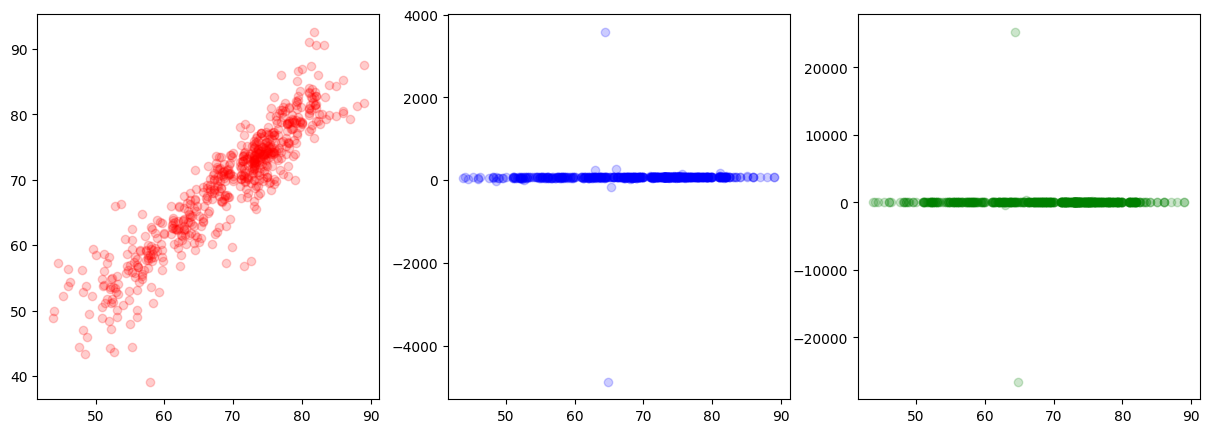

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_test_poly2, color='red', alpha= 0.2)

plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_test_poly3, color='blue', alpha= 0.2)

plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_test_poly4, color='green', alpha=0.2)

plt.show()


## 5. Gradient Descent Methods
**Instruction:** Implement batch, stochastic, and mini-batch gradient descent for linear regression.


###**Batch Gradient Descent**

In [ ]:
def batch_gradient_descent(X, y, learning_rate=0.000000001, epochs=10):
    X_mat=np.array(X)
    y_mat=np.array(y)
    X_mat=np.c_[np.ones(X_mat.shape[0]), X_mat]
    y_mat=y.reshape(-1,1)
    theta = np.random.randn(X_mat.shape[1],1)
    history = []
    for i in range(epochs):
        y_pred = np.dot(X_mat, theta)
        theta_grad= np.dot(X_mat.T, (y_pred - y_mat))
        theta = theta - (learning_rate * theta_grad)
        J = np.sum(np.dot((y_pred - y_mat).T,(y_pred - y_mat))) / (2 * X_mat.shape[0])
        history.append(J)
    return theta, history



In [ ]:
y_train_BGD=np.array(y_train)
start_time_BGD = time.time()
batch_gradient_descent(x_train, y_train_BGD)
end_time_BGD = time.time()
print(batch_gradient_descent(x_train, y_train_BGD)[0])
print(batch_gradient_descent(x_train, y_train_BGD)[1])

[[3.82676681e+89]
 [3.42409988e+91]
 [7.68431292e+92]
 [3.44156434e+89]
 [6.03878628e+91]
 [1.04952093e+92]
 [1.57721386e+90]
 [2.24005031e+92]
 [2.80829336e+91]
 [5.35600627e+93]
 [1.29916947e+91]
 [1.39588387e+92]
 [3.03594359e+91]
 [1.98699155e+90]
 [3.08127446e+91]
 [4.48765575e+89]
 [2.25954207e+93]
 [8.88446070e+97]
 [3.42341262e+90]
 [3.44085448e+90]
 [2.39421174e+89]
 [4.47042361e+90]]
[1350166874688204.5, 4.59346831435908e+34, 1.5627663597916753e+54, 5.3167639965255354e+73, 1.8088423274300874e+93, 6.1539511019124996e+112, 2.0936658541452553e+132, 7.12296317637543e+151, 2.4233381994336318e+171, 8.244557613763394e+190]


In [ ]:
theta= batch_gradient_descent(x_train, y_train_BGD)[0]
x_test_mat=np.array(x_test)
x_train_mat=np.array(x_train)

x_train_mat=np.c_[np.ones(x_train_mat.shape[0]), x_train_mat]
x_test_mat=np.c_[np.ones(x_test_mat.shape[0]), x_test_mat]

y_pred_train_BGD = np.dot(x_train_mat,theta)
y_pred_test_BGD = np.dot(x_test_mat,theta)
print(y_pred_test_BGD)

[[-8.92275711e+104]
 [-2.09594489e+100]
 [-2.90526631e+103]
 [-7.60846594e+103]
 [-1.48381847e+104]
 [-5.25217331e+104]
 [-2.21658735e+103]
 [-1.35112737e+104]
 [-1.68229826e+102]
 [-5.77990687e+103]
 [-7.20531077e+104]
 [-2.51390954e+103]
 [-5.35493584e+102]
 [-1.57149533e+100]
 [-1.52991495e+102]
 [-4.64789191e+103]
 [-7.43770681e+103]
 [-3.89253777e+104]
 [-4.03924342e+104]
 [-2.12927104e+104]
 [-7.68059977e+104]
 [-3.21889746e+102]
 [-2.67309477e+104]
 [-1.40428145e+104]
 [-1.69486899e+103]
 [-4.30688341e+103]
 [-3.41402635e+103]
 [-3.24058544e+103]
 [-2.73425428e+103]
 [-2.89640674e+103]
 [-4.06981229e+105]
 [-2.27413262e+100]
 [-1.78374552e+104]
 [-3.41604525e+103]
 [-2.13055355e+102]
 [-8.76887008e+104]
 [-1.83188402e+105]
 [-4.66164473e+101]
 [-2.23315939e+103]
 [-2.92151239e+104]
 [-2.34622913e+103]
 [-3.23582164e+104]
 [-1.61876556e+104]
 [-9.38528144e+102]
 [-1.60236074e+104]
 [-1.98955802e+103]
 [-2.71707624e+102]
 [-1.64643170e+100]
 [-8.36246177e+103]
 [-7.43310637e+105]


In [ ]:
mae_BGD= mean_absolute_error(y_test, y_pred_test_BGD)
mse_BGD= mean_squared_error(y_test, y_pred_test_BGD)
r2_BGD= r2_score(y_test, y_pred_test_BGD)
mae_BGD_train= mean_absolute_error(y_train, y_pred_train_BGD)
mse_BGD_train= mean_squared_error(y_train, y_pred_train_BGD)
r2_BGD_train= r2_score(y_train, y_pred_train_BGD)
print("MAE for Batch-Gradient-Descent (training data):", mean_absolute_error(y_train, y_pred_train_BGD))
print("MSE for Batch-Gradient-Descent (training data):", mean_squared_error(y_train, y_pred_train_BGD))
print("R2 for Batch-Gradient-Descent (training data):", r2_score(y_train, y_pred_train_BGD))
print("MAE for Batch-Gradient-Descent:", mean_absolute_error(y_test, y_pred_test_BGD))
print("MSE for Batch-Gradient-Descent:", mean_squared_error(y_test, y_pred_test_BGD))
print("R2 for Batch-Gradient-Descent:", r2_score(y_test, y_pred_test_BGD))

MAE for Batch-Gradient-Descent (training data): 5.04316273359566e+104
MSE for Batch-Gradient-Descent (training data): 5.523257707662597e+210
R2 for Batch-Gradient-Descent (training data): -6.038517342554257e+208
MAE for Batch-Gradient-Descent: 6.69210280035586e+104
MSE for Batch-Gradient-Descent: 1.1866245471612047e+211
R2 for Batch-Gradient-Descent: -1.3684102337494966e+209


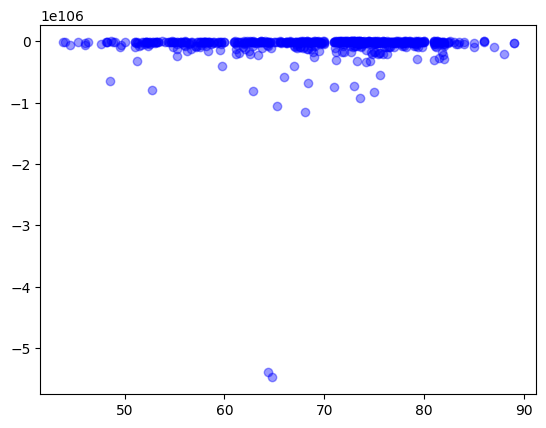

In [ ]:
plt.scatter(y_test, y_pred_test_BGD, color='blue', alpha= 0.4)
plt.show()

###**Stochastic Gradient**

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.00001)
start_time_SGD = time.time()
sgd_reg.fit(x_train, y_train)
end_time_SGD = time.time()
y_pred_SGD = sgd_reg.predict(x_test)
y_pred_SGD_train = sgd_reg.predict(x_train)
print(y_pred_SGD)

[1.58816257e+22 5.65542692e+17 5.17216019e+20 1.35463144e+21
 2.64091521e+21 9.34835626e+21 3.94547166e+20 2.40489007e+21
 3.00192076e+19 1.02884136e+21 1.28246248e+22 4.47511859e+20
 9.53355522e+19 3.64306954e+17 2.72503856e+19 8.27303490e+20
 1.32361082e+21 6.92886043e+21 7.18945480e+21 3.79049663e+21
 1.36713098e+22 5.79014585e+19 4.75787157e+21 2.49955329e+21
 3.01760692e+20 7.66634606e+20 6.07682949e+20 5.76834016e+20
 4.86705253e+20 5.15577495e+20 7.24384877e+22 4.59252133e+17
 3.17490283e+21 6.08055928e+20 3.89530634e+19 1.56076538e+22
 3.26056681e+22 8.31760078e+18 3.97518222e+20 5.20004892e+21
 4.17596583e+20 5.75945177e+21 2.88181224e+21 1.67427851e+20
 2.85207760e+21 3.54142277e+20 4.86565611e+19 3.09960175e+17
 1.48845626e+21 1.32301643e+23 4.62806223e+21 1.62766548e+20
 9.38633630e+19 1.66378299e+22 3.45238590e+20 3.01733822e+21
 2.50886352e+21 4.10752855e+17 1.06221976e+20 1.29229081e+23
 2.88149151e+21 4.29203874e+20 3.03238821e+22 4.09896533e+19
 7.53240945e+21 4.161014

In [ ]:
mae_SGD= mean_absolute_error(y_test, y_pred_SGD)
mse_SGD= mean_squared_error(y_test, y_pred_SGD)
r2_SGD= r2_score(y_test, y_pred_SGD)
mae_SGD_train= mean_absolute_error(y_train, y_pred_SGD_train)
mse_SGD_train= mean_squared_error(y_train, y_pred_SGD_train)
r2_SGD_train= r2_score(y_train, y_pred_SGD_train)
print("MAE for Stochastic-Gradient-Descent(for training data):",mae_SGD_train)
print("MSE for Stochastic-Gradient-Descent(for training data):",mse_SGD_train)
print("R2 for Stochastic-Gradient-Descent(for training data):",r2_SGD_train)
print("MAE for Stochastic-Gradient-Descent(for testing data):", mean_absolute_error(y_test, y_pred_SGD))
print("MSE for Stochastic-Gradient-Descent(for testing data):", mean_squared_error(y_test, y_pred_SGD))
print("R2 for Stochastic-Gradient-Descent(for testing data):", r2_score(y_test, y_pred_SGD))

MAE for Stochastic-Gradient-Descent(for training data): 8.976422101912973e+21
MSE for Stochastic-Gradient-Descent(for training data): 1.749786012797374e+45
R2 for Stochastic-Gradient-Descent(for training data): -1.9130219416300443e+43
MAE for Stochastic-Gradient-Descent(for testing data): 1.191136852805758e+22
MSE for Stochastic-Gradient-Descent(for testing data): 3.759263788206703e+45
R2 for Stochastic-Gradient-Descent(for testing data): -4.335166545688443e+43


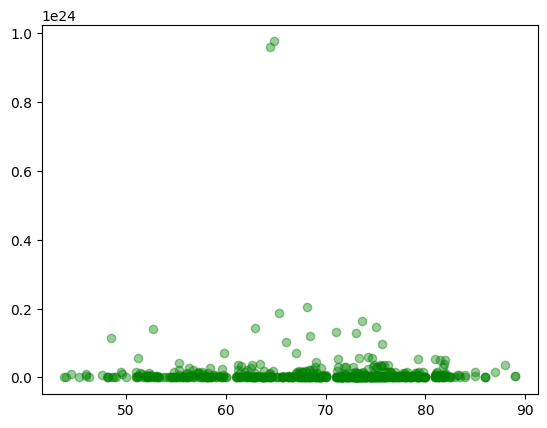

In [ ]:
plt.scatter(y_test, y_pred_SGD, color='green', alpha= 0.4)
plt.show()

###**Mini Batch Gradient Descent**

In [ ]:
def mini_batch_gradient_descent(X, y, learning_rate=0.00001, batch_size=9000, n_iterations=10):
    X=np.array(X)
    X=np.c_[np.ones(X.shape[0]), X]
    y=np.array(y)
    m,n= X.shape
    y=y.reshape(-1,1)
    theta = np.random.randn(X.shape[1],1)
    for iteration in range(n_iterations):
        indices=np.arange(m)
        np.random.shuffle(indices)
        X=X[indices]
        y=y[indices]

        for i in range(0, len(X), batch_size):
            X_batch= X[i:i+batch_size]
            y_batch= y[i:i+batch_size]
            gradients = (2/X.shape[0]) * np.dot(X_batch.T, (np.dot(X_batch, theta) - y_batch))
            theta = theta - learning_rate * gradients
    return theta

In [ ]:
start_time_MBGD= time.time()
mini_batch_gradient_descent(x_train, y_train_BGD)
end_time_MBGD= time.time()

print(mini_batch_gradient_descent(x_train, y_train_BGD)[0], 'is the intercept for the model')
print(mini_batch_gradient_descent(x_train, y_train_BGD)[1:], 'are the coefficients for the model')

[5.96817127e+98] is the intercept for the model
[[-2.00383705e+100]
 [-4.49698066e+101]
 [-2.01405753e+098]
 [-3.53399262e+100]
 [-6.14196139e+100]
 [-9.23010334e+098]
 [-1.31091264e+101]
 [-1.64345740e+100]
 [-3.13441903e+102]
 [-7.60294390e+099]
 [-8.16893174e+100]
 [-1.77668189e+100]
 [-1.16281868e+099]
 [-1.80321023e+100]
 [-2.62624666e+098]
 [-1.32231952e+102]
 [-5.19932600e+106]
 [-2.00343486e+099]
 [-2.01364210e+099]
 [-1.40113033e+098]
 [-2.61616214e+099]] are the coefficients for the model


In [ ]:
weights= mini_batch_gradient_descent(x_train, y_train_BGD)[1:]
biases= mini_batch_gradient_descent(x_train, y_train_BGD)[0]
x_test_mat_mini=np.array(x_test)
x_train_mat_mini=np.array(x_train)
#x_test_mat_mini=np.c_[np.ones(x_test_mat_mini.shape[0]), x_test_mat_mini]
y_pred_test_mini = np.dot(x_test_mat_mini,weights)+biases
y_pred_train_mini = np.dot(x_train_mat_mini,weights)+biases
print(y_pred_test_mini)

[[2.51025597e+114]
 [5.89656103e+109]
 [8.17344012e+112]
 [2.14050397e+113]
 [4.17445429e+113]
 [1.47760376e+114]
 [6.23596673e+112]
 [3.80115195e+113]
 [4.73284120e+111]
 [1.62607203e+113]
 [2.02708358e+114]
 [7.07242879e+112]
 [1.50651413e+112]
 [4.42111725e+109]
 [4.30413839e+111]
 [1.30760014e+113]
 [2.09246399e+113]
 [1.09509494e+114]
 [1.13636792e+114]
 [5.99031810e+113]
 [2.16079752e+114]
 [9.05578453e+111]
 [7.52026760e+113]
 [3.95069131e+113]
 [4.76820669e+112]
 [1.21166358e+113]
 [9.60474427e+112]
 [9.11679974e+112]
 [7.69232879e+112]
 [8.14851534e+112]
 [1.14496792e+115]
 [6.39785989e+109]
 [5.01824470e+113]
 [9.61042410e+112]
 [5.99392621e+111]
 [2.46696265e+114]
 [5.15367364e+114]
 [1.31146924e+111]
 [6.28258914e+112]
 [8.21914553e+113]
 [6.60069037e+112]
 [9.10339764e+113]
 [4.55410347e+113]
 [2.64037881e+112]
 [4.50795148e+113]
 [5.59726084e+112]
 [7.64400148e+111]
 [4.63193715e+109]
 [2.35262703e+113]
 [2.09116974e+115]
 [7.31508909e+113]
 [2.57142789e+112]
 [1.48262671

In [ ]:
mae_MBGD= mean_absolute_error(y_test, y_pred_test_mini)
mse_MBGD= mean_squared_error(y_test, y_pred_test_mini)
r2_MBGD= r2_score(y_test, y_pred_test_mini)
mae_MBGD_train = mean_absolute_error(y_train, y_pred_train_mini)
mse_MBGD_train = mean_squared_error(y_train, y_pred_train_mini)
r2_MBGD_train = r2_score(y_train, y_pred_train_mini)
print("MAE for Mini-Batch-Gradient-Descent (for training data):", mae_MBGD_train)
print("MSE for Mini-Batch-Gradient-Descent (for training data):", mse_MBGD_train)
print("R2 for Mini-Batch-Gradient-Descent (for training data):", r2_MBGD_train)
print("MAE for Mini-Batch-Gradient-Descent (for test data):", mean_absolute_error(y_test, y_pred_test_mini))
print("MSE for Mini-Batch-Gradient-Descent (for test data):", mean_squared_error(y_test, y_pred_test_mini))
print("R2 for Mini-Batch-Gradient-Descent (for test data):", r2_score(y_test, y_pred_test_mini))

MAE for Mini-Batch-Gradient-Descent (for training data): 1.4188024193193107e+114
MSE for Mini-Batch-Gradient-Descent (for training data): 4.3715271849008587e+229
R2 for Mini-Batch-Gradient-Descent (for training data): -4.779342937927565e+227
MAE for Mini-Batch-Gradient-Descent (for test data): 1.882701817299652e+114
MSE for Mini-Batch-Gradient-Descent (for test data): 9.39185122394213e+229
R2 for Mini-Batch-Gradient-Descent (for test data): -1.0830641721883406e+228


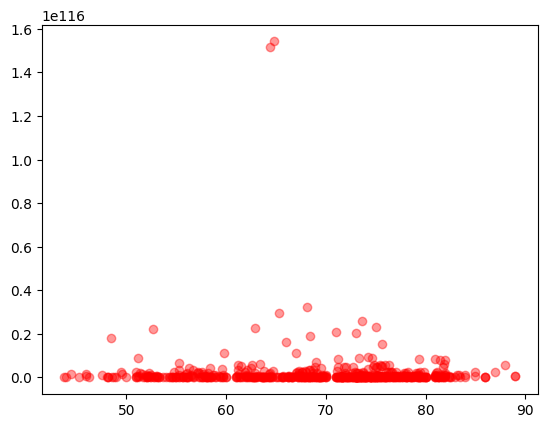

In [ ]:
plt.scatter(y_test, y_pred_test_mini, color='red', alpha= 0.4)
plt.show()


## 6. Regularization Techniques (Ridge,  Lasso, Elastic Net Regression and Early Stopping)
**Instruction:** Implement Ridge, Lasso regression, Elastic Net Regression, and Early Stopping using scikit-learn and compare the results.


In [ ]:

# Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
start_time_ridge = time.time()
ridge_reg.fit(x_train, y_train)
end_time_ridge = time.time()
y_pred_ridge = ridge_reg.predict(x_test)
y_pred_ridge_train = ridge_reg.predict(x_train)

# Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.0001, max_iter=1000, tol=0.1)
start_time_lasso = time.time()
lasso_reg.fit(x_train, y_train)
end_time_lasso = time.time()
y_pred_lasso = lasso_reg.predict(x_test)
y_pred_lasso_train = lasso_reg.predict(x_train)

# Elastic Net Regression
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=1000, tol=0.1)
start_time_elastic = time.time()
elastic_net.fit(x_train, y_train)
end_time_elastic = time.time()
y_pred_elastic = elastic_net.predict(x_test)
y_pred_elastic_train = elastic_net.predict(x_train)

# Calculate performance metrics for each of these
mae_ridge= mean_absolute_error(y_test, y_pred_ridge)
mse_ridge= mean_squared_error(y_test, y_pred_ridge)
r2_ridge= r2_score(y_test, y_pred_ridge)
mae_ridge_train= mean_absolute_error(y_train, y_pred_ridge_train)
mse_ridge_train= mean_squared_error(y_train, y_pred_ridge_train)
r2_ridge_train= r2_score(y_train, y_pred_ridge_train)
print('MAE for Ridge (training data):', mae_ridge_train)
print('MSE for Ridge (training data):', mse_ridge_train)
print('R2 for Ridge (training data):', r2_ridge_train)
print('MAE for Ridge (test data):', mae_ridge)
print('MSE for Ridge (test data):', mse_ridge)
print('R2 for Ridge (test data):', r2_ridge)
print('..................................................................................................')

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
mae_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)
print('MAE for Lasso (training data):', mae_lasso_train)
print('MSE for Lasso (training data):', mse_lasso_train)
print('R2 for Lasso (training data):', r2_lasso_train)
print('MSE for Lasso (test data):', mse_lasso)
print('MAE for Lasso (test data):', mae_lasso)
print('R2 for Lasso (test data):', r2_lasso)
print('..................................................................................................')



mse_elastic= mean_squared_error(y_test, y_pred_elastic)
mae_elastic= mean_absolute_error(y_test, y_pred_elastic)
r2_elastic= r2_score(y_test, y_pred_elastic)
mse_elastic_train= mean_squared_error(y_train, y_pred_elastic_train)
mae_elastic_train= mean_absolute_error(y_train, y_pred_elastic_train)
r2_elastic_train= r2_score(y_train, y_pred_elastic_train)
print('MAE for ElasticNet (training data):', mae_elastic_train)
print('MSE for ElasticNet (training data):', mse_elastic_train)
print('R2 for ElasticNet (training data):', r2_elastic_train)
print('MAE for ElasticNet (test data):', mae_elastic)
print('MSE for ElasticNet (test data):', mse_elastic)
print('R2 for ElasticNet (test data):', r2_elastic)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.33505e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MAE for Ridge (training data): 3.1586527896935017
MSE for Ridge (training data): 17.674552064587715
R2 for Ridge (training data): 0.8067660521872378
MAE for Ridge (test data): 2.9166111177546927
MSE for Ridge (test data): 15.522500355011443
R2 for Ridge (test data): 0.8209952053495467
..................................................................................................
MAE for Lasso (training data): 3.199319106107977
MSE for Lasso (training data): 18.27634206682081
R2 for Lasso (training data): 0.8001867478031262
MSE for Lasso (test data): 16.888800364637024
MAE for Lasso (test data): 3.0036295491254905
R2 for Lasso (test data): 0.8052390934435819
..................................................................................................
MAE for ElasticNet (training data): 3.1836883609458217
MSE for ElasticNet (training data): 17.98702987983424
R2 for ElasticNet (training data): 0.8033497663530429
MAE for ElasticNet (test data): 2.9273217601218815
MSE for ElasticNet

####Graphs for Lasso, Ridge and ElasticNet Regularization

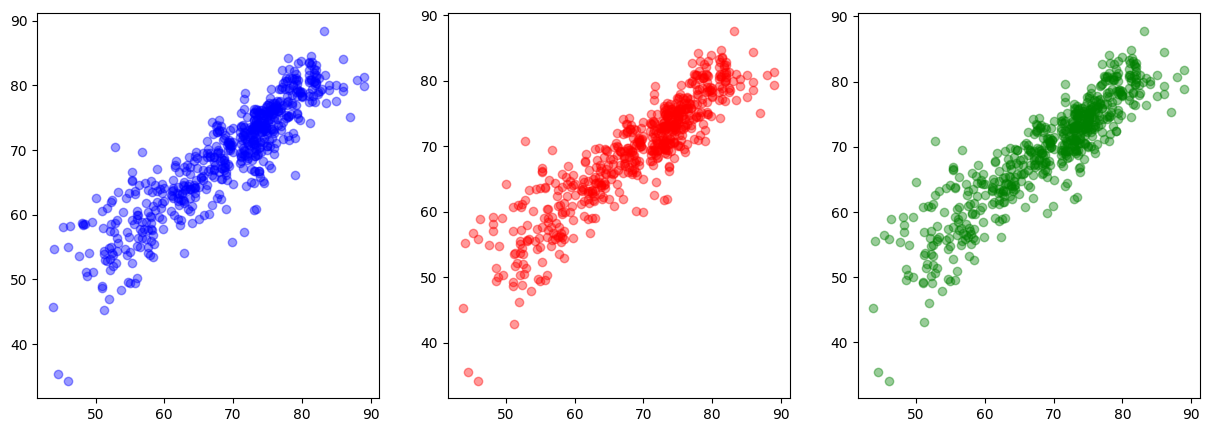

In [ ]:
y_pred_lasso = lasso_reg.predict(x_test)
y_pred_ridge = ridge_reg.predict(x_test)
y_pred_elastic= elastic_net.predict(x_test)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_lasso, color='blue', alpha= 0.4)
plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_ridge, color='red', alpha= 0.4)
plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_elastic, color='green', alpha= 0.4)
plt.show()


## 7. Normal Equation
**Instruction:** Implement the normal equation method for linear regression.


In [ ]:
def normal_equation(X, y):
    X=np.array(X)
    X=np.c_[np.ones(X.shape[0]), X]
    y=np.array(y)
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [ ]:
start_time_ne = time.time()
theta_ne = normal_equation(x_train, y_train)
end_time_ne = time.time()
print(theta_ne)
x_test_mat=np.array(x_test)
x_train_mat=np.array(x_train)
x_train_mat=np.c_[np.ones(x_train_mat.shape[0]), x_train_mat]
x_test_mat=np.c_[np.ones(x_test_mat.shape[0]), x_test_mat]
y_pred_ne = x_test_mat.dot(theta_ne)
y_pred_ne_train = x_train_mat.dot(theta_ne)
print("The predicted values are :")
print(y_pred_ne)

[-1.26828045e-04  3.57564905e-03  2.85203661e-02 -1.93202646e-02
 -2.30544954e-02  1.07068330e-01  1.65159847e-01  2.98543380e-04
 -1.97940150e-02 -3.76118683e-05  4.80283431e-02 -7.95795183e-02
  2.81684095e-02 -1.16985899e-02  4.74616396e-02 -4.62084133e-01
  2.72248777e-05  6.96957270e-10 -5.80323771e-02 -3.45595131e-02
  3.28610688e-02  7.65892385e-01]
The predicted values are :
[66.72977992 75.94597581 75.57252392 77.30650481 45.91029903 49.89286497
 68.29802881 70.73470415 74.27136812 54.81529964 51.40210835 63.17939299
 65.81204293 70.22948574 70.51766103 62.99266579 57.27917895 80.79911236
 68.49865216 80.21412185 80.71370078 84.55475269 70.92412015 68.5396106
 69.56861659 67.96427879 60.64647355 63.99563914 76.21953711 71.83940598
 65.6186075  75.5882714  72.74425173 68.54485131 80.69762263 59.21994456
 67.71123164 72.81257455 65.98838979 75.91127656 57.54563312 64.54862222
 74.78913185 79.9936453  76.3110574  58.81811842 77.77292391 70.08374949
 67.10837149 67.3192346  56.779

In [ ]:
mae_ne= mean_absolute_error(y_test, y_pred_ne)
mse_ne= mean_squared_error(y_test, y_pred_ne)
r2_ne= r2_score(y_test, y_pred_ne)
mae_ne_train= mean_absolute_error(y_train, y_pred_ne_train)
mse_ne_train= mean_squared_error(y_train, y_pred_ne_train)
r2_ne_train= r2_score(y_train, y_pred_ne_train)
print('MAE for Normal Equation (training data):', mae_ne_train)
print('MSE for Normal Equation (training data):', mse_ne_train)
print('R2 for Normal Equation (training data):', r2_ne_train)
print('MAE for Normal Equation (test data):', mae_ne)
print('MSE for Normal Equation (test data):', mse_ne)
print('R2 for Normal Equation (test data):', r2_ne)

MAE for Normal Equation (training data): 3.1989009215550603
MSE for Normal Equation (training data): 18.215544931106887
R2 for Normal Equation (training data): 0.8008514362493611
MAE for Normal Equation (test data): 2.931466323041371
MSE for Normal Equation (test data): 15.810412999345274
R2 for Normal Equation (test data): 0.817675009337465


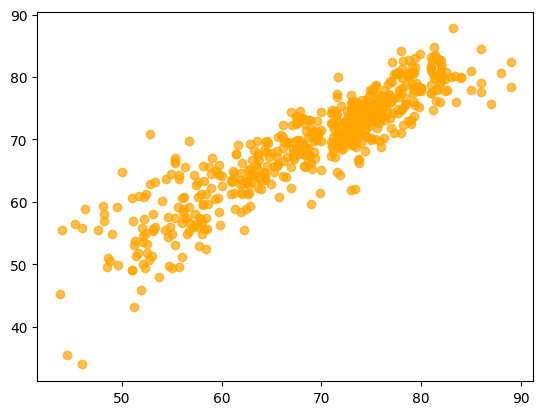

In [ ]:
plt.scatter(y_test, y_pred_ne, color='orange', alpha= 0.7)
plt.show()

## 8. Implement linear Regression using SVD


In [ ]:
def svd_equation(X,y):
  U, s, Vh = np.linalg.svd(X, full_matrices=False)
  X_svd= U@np.diag(s)@Vh
  theta_svd= normal_equation(X_svd,y)
  return theta_svd

In [ ]:
start_time_svd= time.time()
svd_equation(x_train, y_train)
end_time_svd= time.time()
print(svd_equation(x_train, y_train))

[-1.26828045e-04  3.57564905e-03  2.85203661e-02 -1.93202646e-02
 -2.30544954e-02  1.07068330e-01  1.65159847e-01  2.98543380e-04
 -1.97940150e-02 -3.76118683e-05  4.80283431e-02 -7.95795183e-02
  2.81684095e-02 -1.16985900e-02  4.74616396e-02 -4.62084133e-01
  2.72248777e-05  6.96957277e-10 -5.80323772e-02 -3.45595131e-02
  3.28610688e-02  7.65892385e-01]


In [ ]:
y_pred_svd= np.dot(x_test_mat,svd_equation(x_train, y_train))
y_pred_svd_train= np.dot(x_train_mat,svd_equation(x_train, y_train))
print(y_pred_svd)

[66.72977992 75.94597581 75.57252392 77.30650481 45.91029903 49.89286497
 68.29802881 70.73470415 74.27136812 54.81529964 51.40210835 63.17939299
 65.81204293 70.22948574 70.51766103 62.99266579 57.27917895 80.79911236
 68.49865216 80.21412185 80.71370078 84.55475269 70.92412015 68.5396106
 69.5686166  67.96427879 60.64647355 63.99563914 76.21953711 71.83940598
 65.6186075  75.5882714  72.74425173 68.54485131 80.69762263 59.21994456
 67.71123164 72.81257455 65.98838979 75.91127656 57.54563312 64.54862222
 74.78913185 79.9936453  76.31105739 58.81811842 77.77292391 70.08374949
 67.10837149 67.3192346  56.77999135 64.85172187 78.24968523 75.21811395
 72.4951979  60.43732875 74.91905252 69.68558351 67.35481914 69.19549321
 79.92529261 54.36588931 73.34816314 69.66344769 51.73679692 53.05508286
 53.76494959 79.24295413 58.34346709 76.74329321 82.35130312 74.76147063
 73.2086197  60.54877077 55.96548224 72.5860093  64.01637233 76.53658393
 55.6151097  67.70086853 64.10913526 61.36577949 66.

In [ ]:
mae_svd= mean_absolute_error(y_test, y_pred_svd)
mse_svd= mean_squared_error(y_test, y_pred_svd)
r2_svd= r2_score(y_test, y_pred_svd)
mae_svd_train= mean_absolute_error(y_train, y_pred_svd_train)
mse_svd_train= mean_squared_error(y_train, y_pred_svd_train)
r2_svd_train= r2_score(y_train, y_pred_svd_train)
print('MAE for SVD (training data):', mae_svd_train)
print('MSE for SVD (training data):', mse_svd_train)
print('R2 for SVD (training data):', r2_svd_train)
print('MAE for SVD (test data):', mae_svd)
print('MSE for SVD (test data):', mse_svd)
print('R2 for SVD (test data):', r2_svd)

MAE for SVD (training data): 3.1989009215665143
MSE for SVD (training data): 18.215544931111072
R2 for SVD (training data): 0.8008514362493153
MAE for SVD (test data): 2.9314663230698677
MSE for SVD (test data): 15.810412999653314
R2 for SVD (test data): 0.8176750093339127


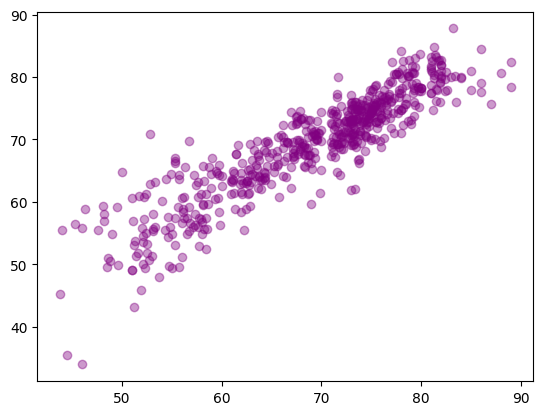

In [ ]:
plt.scatter(y_test, y_pred_svd, color='purple', alpha= 0.4)
plt.show()


## 9. Performance Metrics and Computational Analysis
**Instruction:** Compare the performance and computational time of all models implemented.


In [ ]:
print(f'Training Time (Linear Regression): {end_time_lr - start_time_lr} seconds')
print(f'Training Time (Polynomial Regression of degree 2): {end_time_poly2 - start_time_poly2} seconds')
print(f'Training Time (Polynomial Regression of degree 3): {end_time_poly3 - start_time_poly3} seconds')
print(f'Training Time (Polynomial Regression of degree 4): {end_time_poly4 - start_time_poly4} seconds')
print(f'Training Time (Batch Gradient Descent): {end_time_BGD - start_time_BGD} seconds')
print(f'Training Time (Stochastic Gradient Descent): {end_time_SGD - start_time_SGD} seconds')
print(f'Training Time (Mini Batch Gradient Descent): {end_time_MBGD - start_time_MBGD} seconds')
print(f'Training Time (Lasso Regularization): {end_time_lasso - start_time_lasso} seconds')
print(f'Training Time (Ridge Regularization): {end_time_ridge - start_time_ridge} seconds')
print(f'Training Time (Elastic Regularization): {end_time_elastic - start_time_elastic} seconds')
print(f'Training Time (Normal Equation): {end_time_ne - start_time_ne} seconds')
print(f'Training Time (SVD): {end_time_svd - start_time_svd} seconds')

Training Time (Linear Regression): 0.02864813804626465 seconds
Training Time (Polynomial Regression of degree 2): 0.20047569274902344 seconds
Training Time (Polynomial Regression of degree 3): 10.268027305603027 seconds
Training Time (Polynomial Regression of degree 4): 20.80181646347046 seconds
Training Time (Batch Gradient Descent): 0.0032672882080078125 seconds
Training Time (Stochastic Gradient Descent): 0.008501052856445312 seconds
Training Time (Mini Batch Gradient Descent): 0.014796733856201172 seconds
Training Time (Lasso Regularization): 0.010129928588867188 seconds
Training Time (Ridge Regularization): 0.01143336296081543 seconds
Training Time (Elastic Regularization): 0.1241614818572998 seconds
Training Time (Normal Equation): 0.00779414176940918 seconds
Training Time (SVD): 0.012270212173461914 seconds


In [ ]:
time_result= [end_time_lr - start_time_lr, end_time_poly2 - start_time_poly2, end_time_poly3 - start_time_poly3, end_time_poly4 - start_time_poly4, end_time_BGD - start_time_BGD, end_time_SGD - start_time_SGD, end_time_MBGD - start_time_MBGD, end_time_lasso - start_time_lasso, end_time_ridge - start_time_ridge, end_time_elastic - start_time_elastic, end_time_ne - start_time_ne, end_time_svd - start_time_svd]
models= ['Linear Regression', 'Polynomial Regression of degree 2', 'Polynomial Regression of degree 3', 'Polynomial Regression of degree 4', 'Batch Gradient Descent', 'Stochastic Gradient Descent','Mini Batch Gradient Descent', 'Lasso Regularization', 'Ridge Regular', 'Elastic Regularization', 'Normal Equation', 'SVD']
mse_scores= [mse_lr, mse_pr2, mse_pr3, mse_pr4, mse_BGD, mse_SGD, mse_MBGD, mse_lasso, mse_ridge, mse_elastic, mse_ne, mse_svd]
mse_scores_train= [mse_lr_train, mse_pr2_train, mse_pr3_train, mse_pr4_train, mse_BGD_train, mse_SGD_train, mse_MBGD_train, mse_lasso_train, mse_ridge_train, mse_elastic_train, mse_ne_train, mse_svd_train]
mae_scores=[mae_lr, mae_pr2, mae_pr3, mae_pr4, mae_BGD, mae_SGD, mse_MBGD, mae_lasso, mae_ridge, mae_elastic, mae_ne, mae_svd]
mae_scores_train= [mae_lr_train, mae_pr2_train, mae_pr3_train, mae_pr4_train, mae_BGD_train, mae_SGD_train, mae_MBGD_train, mae_lasso_train, mae_ridge_train, mae_elastic_train, mae_ne_train, mae_svd_train]
r2_scores= [r2_lr, r2_pr2, r2_pr3, r2_pr4, r2_BGD, r2_SGD, r2_MBGD, r2_lasso, r2_ridge, r2_elastic, r2_ne, r2_svd]
r2_scores_train= [r2_lr_train, r2_pr2_train, r2_pr3_train, r2_pr4_train, r2_BGD_train, r2_SGD_train, r2_MBGD_train, r2_lasso_train, r2_ridge_train, r2_elastic_train, r2_ne_train, r2_svd_train]
Z=range(len(models))

###Visualization of Time Complexity

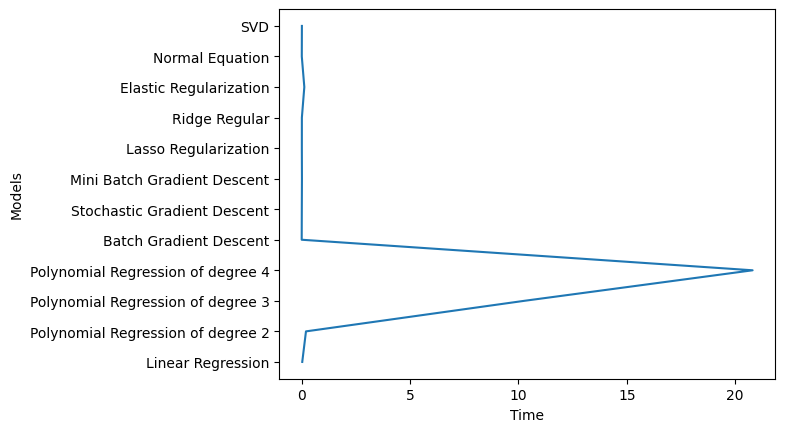

In [ ]:
plt.plot(time_result, models)
plt.xlabel('Time')
plt.ylabel('Models')
plt.show()

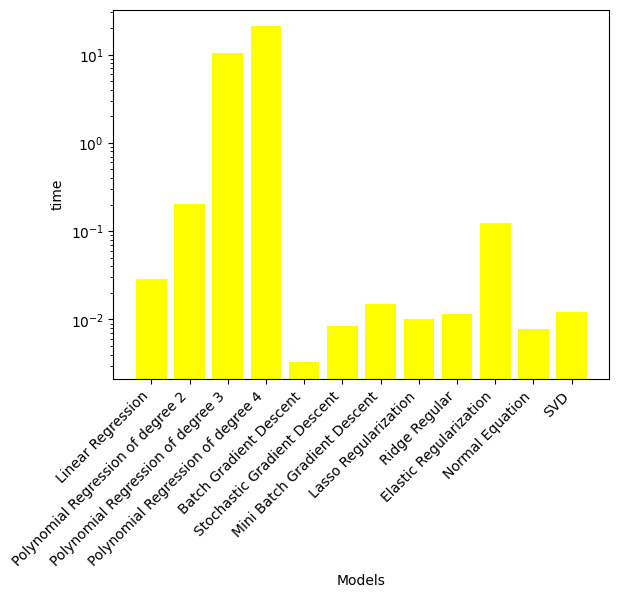

In [ ]:
fig, ax= plt.subplots()
ax.bar(Z, time_result, color='yellow')
ax.set_yscale('log')
plt.xticks(Z, models, rotation=45, ha= 'right')
plt.xlabel('Models')
plt.ylabel('time')
plt.tight_layout
plt.show()

###Visualization of errors

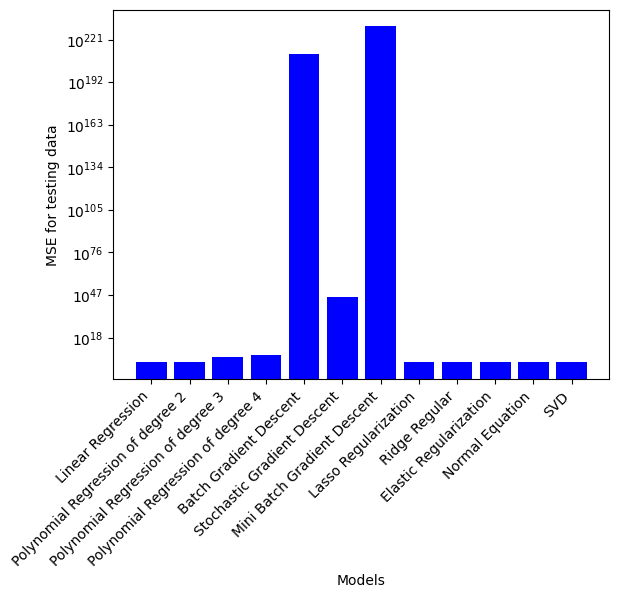

In [ ]:
fig, ax= plt.subplots()
ax.bar(Z, mse_scores, color='blue')
ax.set_yscale('log')
plt.xticks(Z, models, rotation=45, ha= 'right')
plt.xlabel('Models')
plt.ylabel('MSE for testing data')
plt.tight_layout
plt.show()

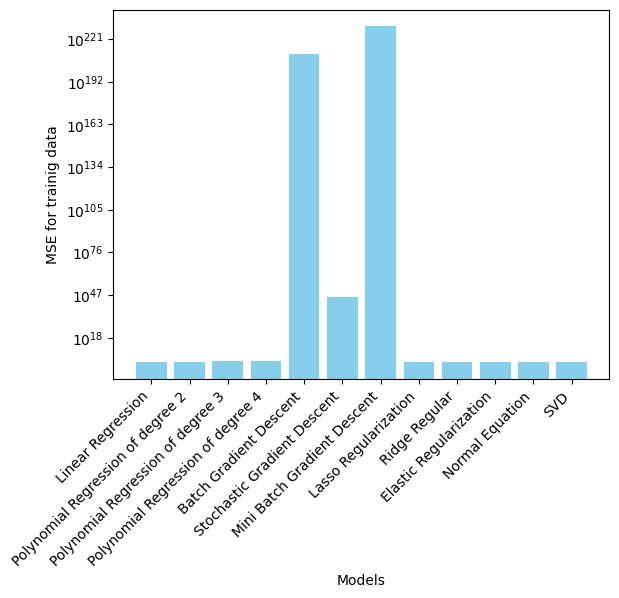

In [ ]:
fig, ax= plt.subplots()
ax.bar(Z, mse_scores_train, color='skyblue')
ax.set_yscale('log')
plt.xticks(Z, models, rotation=45, ha= 'right')
plt.xlabel('Models')
plt.ylabel('MSE for trainig data')
plt.show()

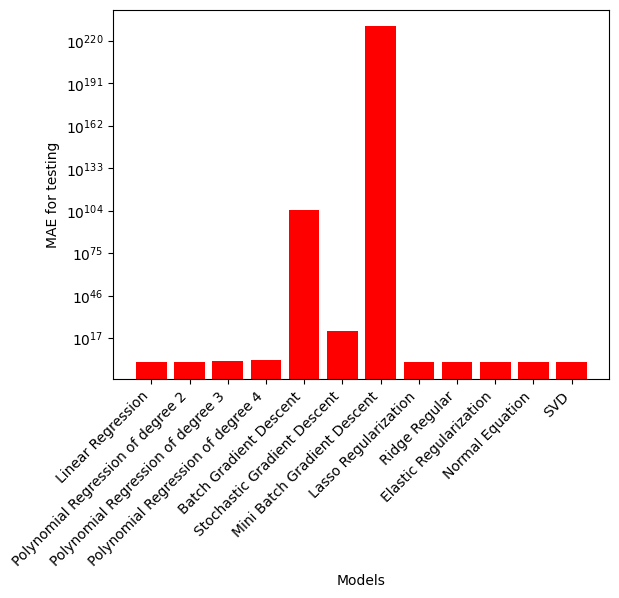

In [ ]:
fig, ax= plt.subplots()
ax.bar(Z, mae_scores, color='red')
ax.set_yscale('log')
plt.xticks(Z, models, rotation=45, ha= 'right')
plt.xlabel('Models')
plt.ylabel('MAE for testing')
plt.show()

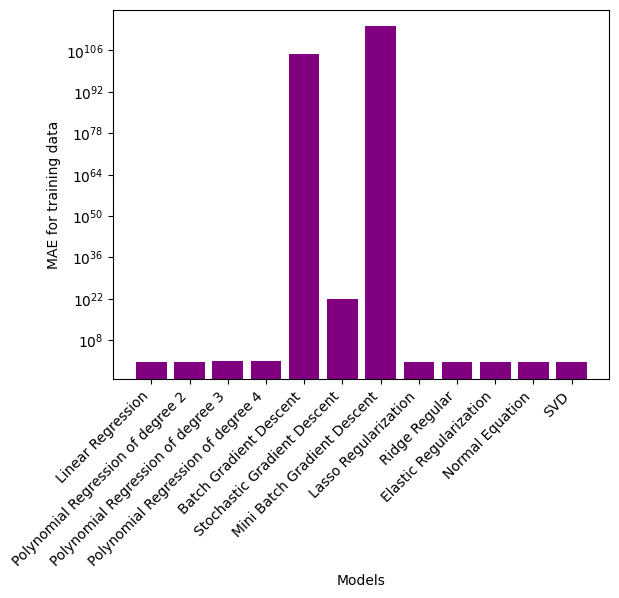

In [ ]:
fig, ax= plt.subplots()
ax.bar(Z, mae_scores_train, color='purple')
ax.set_yscale('log')
plt.xticks(Z, models, rotation=45, ha= 'right')
plt.xlabel('Models')
plt.ylabel('MAE for training data')
plt.show()

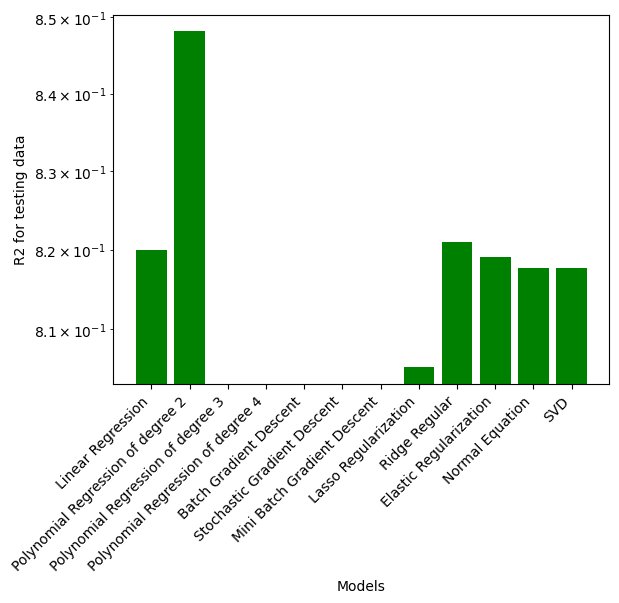

In [ ]:
fig, ax= plt.subplots()
ax.bar(Z, r2_scores, color='green')
ax.set_yscale('log')
plt.xticks(Z, models, rotation=45, ha= 'right')
plt.xlabel('Models')
plt.ylabel('R2 for testing data')
plt.show()

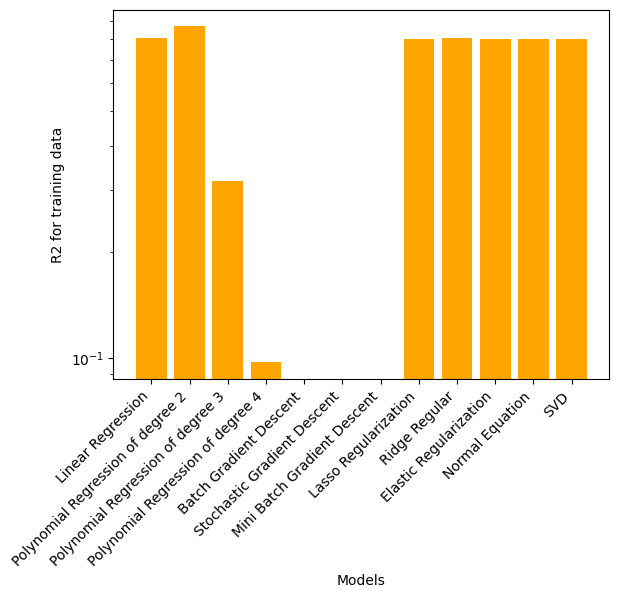

In [ ]:
fig, ax= plt.subplots()
ax.bar(Z, r2_scores_train, color='orange')
ax.set_yscale('log')
plt.xticks(Z, models, rotation=45, ha= 'right')
plt.xlabel('Models')
plt.ylabel('R2 for training data')
plt.show()


## Conclusion
In this project, various machine learning models were applied to the a dataset
that describes about life-expectancy of different countries in differnt years with respect to some features, to assess their performance in terms of time complexity and accuracy metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²) score. Based on the results we conclude the following:

**Model Performance:**

The model: ***Polynomial regression of degree 2*** outperformed the others in terms of *R2_score*, showing the *highest R² score with low MSE and MAE*. This suggests that ***Polynomial regression of degree 2*** is particularly well-suited for the dataset used in this project.

***Mini Batch Gradient Descent*** had the *highest MAE and MSE*, indicating potential limitations in its predictive power for this dataset.

**Time Complexity:**

Among the models, ***Model of Normal Equation*** had the most efficient computational performance with a time of 0.004111051559448242 seconds, making it a good candidate for larger datasets where computational cost is a concern.
On the other hand, ***Polynomial of degree 4*** had the *highest time complexity*, which might limit its practicality for real-time applications. The model *Polynomial of degree 2* had highest accuracy but it took (0.11253690719604492 seconds) comaparitively more time which can be a potential limitation for it, as a model where time is essence.

**Trade-offs:**

While some models, like ***Polynomial of degree 2*** and ***Elastic regularization***, performed reasonably well in terms of accuracy, they exhibited higher computational complexity, indicating a trade-off between performance and scalability.
Conversely, simpler models such as ***Linear regression***,***Ridge regularization*** and ***Normal Equation*** were computationally efficient but less accurate, making them suitable for applications where speed is more critical than predictive precision.


**Final Insights:**

The results suggest that ***Ridge Regularization*** strikes the best balance between accuracy and efficiency for this dataset. However, depending on the application domain, the choice of model may need to prioritize either predictive accuracy or computational efficiency. If one prioritize the predictive accuracy then ***Model of Polynomial of degree 2*** stands best.
and in case of computational efficiency ***Normal equation*** and ***Ridge Regression*** is tough to beat.
